<a href="https://colab.research.google.com/github/ange86rosales-oss/Angelina_Rosales/blob/Reentrega-proyecto-final/Entrega%20proyecto%20final/ProyectoParteIII%2BROSALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np


df = pd.read_csv ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")

df.columns = df.columns.str.strip()

# Agregar la columna 'Resultado Partido' con el nombre del equipo ganador
df["Resultado Partido"] = np.where(df["ScoreA"] > df["ScoreB"], df["TeamA"],np.where(df["ScoreA"] < df["ScoreB"], df["TeamB"], "Empate"))


print (df.head())

         Date        TeamA        TeamB  ScoreA  ScoreB Sex  \
0  2000/04/23       Angola      Tunisia      30      22   W   
1  2000/04/23  Ivory Coast      Senegal      26      11   W   
2  2000/04/25       Angola      Senegal      30      19   W   
3  2000/04/25      Tunisia  Ivory Coast      21      20   W   
4  2000/04/27      Tunisia      Senegal      36      23   W   

        TournamentName  year    Venue  WinningTeam Resultado Partido  
0  AfricanChampionship  2000  Algeria       Angola            Angola  
1  AfricanChampionship  2000  Algeria  Ivory Coast       Ivory Coast  
2  AfricanChampionship  2000  Algeria       Angola            Angola  
3  AfricanChampionship  2000  Algeria      Tunisia           Tunisia  
4  AfricanChampionship  2000  Algeria      Tunisia           Tunisia  


In [8]:
import pandas as pd
import plotly.express as px

# Cargar el archivo CSV
df = pd.read_csv ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")

# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Crear un DataFrame con goles por equipo
goals_by_team = pd.DataFrame({
    "Team": df["TeamA"].tolist() + df["TeamB"].tolist(),
    "Goals": df["ScoreA"].tolist() + df["ScoreB"].tolist()
})

# Calcular goles totales por equipo
total_goals = goals_by_team.groupby("Team")["Goals"].sum().reset_index()

# Ordenar por goles descendente
total_goals = total_goals.sort_values(by="Goals", ascending=False)

# Crear gráfico de barras
fig = px.bar(
    total_goals,
    x="Team",
    y="Goals",
    title="Ranking de Goles Totales por Equipo 2023",
    labels={"Team": "Equipo", "Goals": "Goles Totales"}
)

fig.show()

In [11]:
import pandas as pd
import plotly.express as px

# Cargar el archivo CSV
df = pd.read_csv ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")


# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Determinar el equipo ganador por partido
df["WinningTeam"] = df.apply(
    lambda row: row["TeamA"] if row["ScoreA"] > row["ScoreB"]
    else row["TeamB"] if row["ScoreB"] > row["ScoreA"]
    else "Draw", axis=1
)

# Calcular la diferencia de goles
df["GoalDifference"] = abs(df["ScoreA"] - df["ScoreB"])

# Filtrar partidos ganados (excluir empates)
df_wins = df[df["WinningTeam"] != "Draw"]

# Calcular el número de victorias por equipo
victory_counts = df_wins["WinningTeam"].value_counts().nlargest(10).index.tolist()

# Filtrar los partidos ganados por los 10 equipos con más victorias
df_top_wins = df_wins[df_wins["WinningTeam"].isin(victory_counts)]

# Crear gráfico de cajas
fig = px.box(
    df_top_wins,
    x="WinningTeam",
    y="GoalDifference",
    title="Distribución de la Diferencia de Goles por Equipo (Top 10 en Victorias)",
    labels={"WinningTeam": "Equipo Ganador", "GoalDifference": "Diferencia de Goles"}
)

fig.show()

In [12]:
import pandas as pd
import plotly.express as px

# Cargar el archivo CSV
df = pd.read_csv ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")


# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Determinar el equipo ganador por partido
df["WinningTeam"] = df.apply(
    lambda row: row["TeamA"] if row["ScoreA"] > row["ScoreB"]
    else row["TeamB"] if row["ScoreB"] > row["ScoreA"]
    else "Draw", axis=1
)

# Filtrar partidos con ganador (excluir empates)
df_wins = df[df["WinningTeam"] != "Draw"]

# Contar victorias por equipo y torneo
victory_counts = df_wins.groupby(["TournamentName", "WinningTeam"]).size().reset_index(name="Victories")

# Crear gráfico tipo treemap
fig = px.treemap(
    victory_counts,
    path=["TournamentName", "WinningTeam"],
    values="Victories",
    title="Cantidad de Victorias por Equipo según Torneo"
)

fig.show()



In [13]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")

# Diagnóstico de valores perdidos por columna
missing_values = df.isnull().sum()

# Mostrar el resultado
print("Diagnóstico de valores perdidos por columna:")
print(missing_values)


Diagnóstico de valores perdidos por columna:
Date              0
TeamA             0
TeamB             0
ScoreA            0
ScoreB            0
Sex               0
TournamentName    0
year              0
Venue             0
WinningTeam       0
dtype: int64


In [14]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")

# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Determinar el equipo ganador por partido
df["WinningTeam"] = df.apply(
    lambda row: row["TeamA"] if row["ScoreA"] > row["ScoreB"]
    else row["TeamB"] if row["ScoreB"] > row["ScoreA"]
    else "Draw", axis=1
)


# Filtrar empates
df = df[df['WinningTeam'] != 'Draw']

# Agrupar por torneo y equipo ganador
grouped = df.groupby(['TournamentName', 'WinningTeam']).size().reset_index(name='Wins')

# Total de partidos por torneo
total_matches = df.groupby('TournamentName').size().reset_index(name='TotalMatches')

# Calcular tasa de victorias
data = pd.merge(grouped, total_matches, on='TournamentName')
data['WinRate'] = data['Wins'] / data['TotalMatches']

# Obtener el mejor equipo por torneo
best_teams = data.sort_values(['TournamentName', 'WinRate'], ascending=[True, False])
best_per_tournament = best_teams.groupby('TournamentName').first().reset_index()

print(best_per_tournament[['TournamentName', 'WinningTeam', 'WinRate']])

                         TournamentName         WinningTeam   WinRate
0                   AfricanChampionship              Angola  0.225694
1                     AsianChampionship         South Korea  0.213740
2                          CaribbeanCup                Cuba  0.236842
3      CentralAmericanAndCaribbeanGames  Dominican Republic  0.192308
4           CentralAmericanChampionship           Nicaragua  0.277778
5                  CentralAmericanGames           Guatemala  0.450000
6                  EuropeanChampionship              Norway  0.148649
7                 EuropeanChampionshipQ          Montenegro  0.061584
8                     NorCaChampionship                Cuba  0.206897
9                               Olympic              Norway  0.159184
10          OlympicAfricanQualification              Angola  0.625000
11       OlympicAsianQualificationEvent         South Korea  0.360000
12                             OlympicQ              Russia  0.112500
13                  

In [15]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Cargar el archivo
file_path = ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")
df = pd.read_csv(file_path)

# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Determinar el equipo ganador por partido
df["WinningTeam"] = df.apply(
    lambda row: row["TeamA"] if row["ScoreA"] > row["ScoreB"]
    else row["TeamB"] if row["ScoreB"] > row["ScoreA"]
    else "Draw", axis=1
)

# Filtrar partidos con ganador
df = df[df['WinningTeam'] != 'Draw']

# --- 1) Promedio de victorias por torneo ---
wins_per_tournament = df.groupby(['TournamentName', 'WinningTeam']).size().reset_index(name='Wins')
total_matches_per_tournament = df.groupby('TournamentName').size().reset_index(name='TotalMatches')

wins_per_tournament = wins_per_tournament.merge(total_matches_per_tournament, on='TournamentName')
wins_per_tournament['WinRate'] = wins_per_tournament['Wins'] / wins_per_tournament['TotalMatches']

wins_sorted = wins_per_tournament.sort_values('WinRate', ascending=False).head(15)

fig1 = px.bar(wins_sorted, x='WinningTeam', y='WinRate', color='TournamentName',
              title='Top 15 equipos con mejor promedio de victorias por torneo',
              labels={'WinningTeam': 'Equipo', 'WinRate': 'Promedio de victorias'})
fig1.write_html('top_winrate_per_tournament.html')

# --- 2) Ranking global ---
global_wins = df.groupby('WinningTeam').size().reset_index(name='TotalWins')
global_wins_sorted = global_wins.sort_values('TotalWins', ascending=False).head(20)

fig2 = px.bar(global_wins_sorted, x='WinningTeam', y='TotalWins',
              title='Ranking global de equipos más dominantes (total de victorias)',
              labels={'WinningTeam': 'Equipo', 'TotalWins': 'Total de victorias'})
fig2.write_html('global_dominant_teams.html')

In [16]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

# Cargar dataset
df = pd.read_csv ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")

# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Determinar el equipo ganador por partido
df["WinningTeam"] = df.apply(
    lambda row: row["TeamA"] if row["ScoreA"] > row["ScoreB"]
    else row["TeamB"] if row["ScoreB"] > row["ScoreA"]
    else "Draw", axis=1
)


# Información general
print(df.info())
print(df.describe())

# Valores nulos
print(df.isnull().sum())

# Histogramas
px.histogram(df, x="ScoreA", nbins=20, title="Distribución ScoreA").show()
px.histogram(df, x="ScoreB", nbins=20, title="Distribución ScoreB").show()
px.histogram(df, x="year", nbins=20, title="Distribución Year").show()

# Boxplot
px.box(df.melt(value_vars=['ScoreA','ScoreB'], var_name='Equipo', value_name='Goles'),
       x='Equipo', y='Goles', title='Boxplot ScoreA vs ScoreB').show()

# Conteo categorías
print(df['TournamentName'].value_counts().head(10))
print(df['WinningTeam'].value_counts().head(10))

# Heatmap correlación
corr_matrix = df[['ScoreA','ScoreB']].corr()
fig = ff.create_annotated_heatmap(z=corr_matrix.values,
                                  x=corr_matrix.columns.tolist(),
                                  y=corr_matrix.columns.tolist(),
                                  annotation_text=corr_matrix.round(2).values)
fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            3875 non-null   object
 1   TeamA           3875 non-null   object
 2   TeamB           3875 non-null   object
 3   ScoreA          3875 non-null   int64 
 4   ScoreB          3875 non-null   int64 
 5   Sex             3875 non-null   object
 6   TournamentName  3875 non-null   object
 7   year            3875 non-null   int64 
 8   Venue           3875 non-null   object
 9   WinningTeam     3875 non-null   object
dtypes: int64(3), object(7)
memory usage: 302.9+ KB
None
            ScoreA       ScoreB         year
count  3875.000000  3875.000000  3875.000000
mean     27.344516    25.490065  2014.248258
std       7.722622     7.566746     6.623381
min       0.000000     0.000000  2000.000000
25%      23.000000    21.000000  2010.000000
50%      27.000000    25.000000  2015.

TournamentName
WorldChampionship                   1026
EuropeanChampionshipQ                708
EuropeanChampionship                 552
AfricanChampionship                  301
AsianChampionship                    263
Olympic                              260
WChEuropeanQ                         242
CentralAmericanAndCaribbeanGames     104
PanAmericanGames                     102
OlympicQ                              82
Name: count, dtype: int64
WinningTeam
Norway     225
France     193
Russia     175
Denmark    166
Draw       158
Hungary    149
Romania    140
Germany    129
Spain      129
Sweden     129
Name: count, dtype: int64


In [17]:
import pandas as pd

# Cargar dataset
df = pd.read_csv ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")

# Eliminar duplicados
df = df.drop_duplicates()

# Eliminar outliers usando IQR
for col in ['ScoreA', 'ScoreB']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Guardar dataset limpio
df.to_csv("Handball_W_InternationalResults_clean.csv", index=False)

In [18]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Cargar dataset
df = pd.read_csv("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")

# Identificar columnas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Imputación numérica (media)
imputer_mean = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_mean.fit_transform(df[numeric_cols])

# Imputación categórica (moda)
imputer_mode = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])

# Guardar dataset imputado
df.to_csv("Handball_W_InternationalResults_imputed.csv", index=False)

In [ ]:
import plotly.express as px

# Sample data
df = px.data.iris()

# Create a simple scatter plot
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 title="Iris Sepal Length vs. Width")

# Export the plot as an HTML file
fig.write_html("iris_scatter_plot.html")

print("Plot exported as iris_scatter_plot.html")

Plot exported as iris_scatter_plot.html


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargar dataset
df = pd.read_csv("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")
df['TotalGoals'] = df['ScoreA'] + df['ScoreB']

# Variables
X = df[['TournamentName', 'year']]
y = df['TotalGoals']

# Dummies para torneos
X = pd.get_dummies(X, columns=['TournamentName'], drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación
r2 = r2_score(y_test, model.predict(X_test))
print("R²:", r2)

# Coeficientes
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)

# Predicción ejemplo
example = pd.DataFrame([[2023] + [0]*(len(X.columns)-1)], columns=X.columns)
pred_example = model.predict(example)[0]
print("Predicción WorldChampionship 2023:", pred_example)

R²: 0.017590391762516977
                                              Feature  Coefficient
0                                                year    -0.003810
1                    TournamentName_AsianChampionship     4.941193
2                         TournamentName_CaribbeanCup     3.091575
3     TournamentName_CentralAmericanAndCaribbeanGames     3.771409
4          TournamentName_CentralAmericanChampionship     3.552938
5                 TournamentName_CentralAmericanGames    -2.870619
6                 TournamentName_EuropeanChampionship     1.029006
7                TournamentName_EuropeanChampionshipQ     2.116809
8                    TournamentName_NorCaChampionship     0.767111
9                              TournamentName_Olympic     2.608109
10         TournamentName_OlympicAfricanQualification    -5.663593
11      TournamentName_OlympicAsianQualificationEvent     4.282121
12                            TournamentName_OlympicQ     3.431500
13                    TournamentName_

In [20]:
import pandas as pd
import statsmodels.api as sm

# Cargar dataset
df = pd.read_csv("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")
df['TotalGoals'] = df['ScoreA'] + df['ScoreB']

# Modelo simple
X_simple = sm.add_constant(df['year'].astype(float))
y = df['TotalGoals'].astype(float)
model_simple = sm.OLS(y, X_simple).fit()

# Modelo múltiple
dummies = pd.get_dummies(df['TournamentName'], drop_first=True)
X_multiple = pd.concat([df['year'], dummies], axis=1).astype(float)
X_multiple = sm.add_constant(X_multiple)
model_multiple = sm.OLS(y, X_multiple).fit()

# Predicción
pred_cols = model_multiple.model.exog_names
pred_data = pd.DataFrame([[0]*len(pred_cols)], columns=pred_cols)
pred_data['const'] = 1
pred_data['year'] = 2025
if 'WorldChampionship' in pred_data.columns:
    pred_data['WorldChampionship'] = 1
prediction = model_multiple.predict(pred_data)[0]

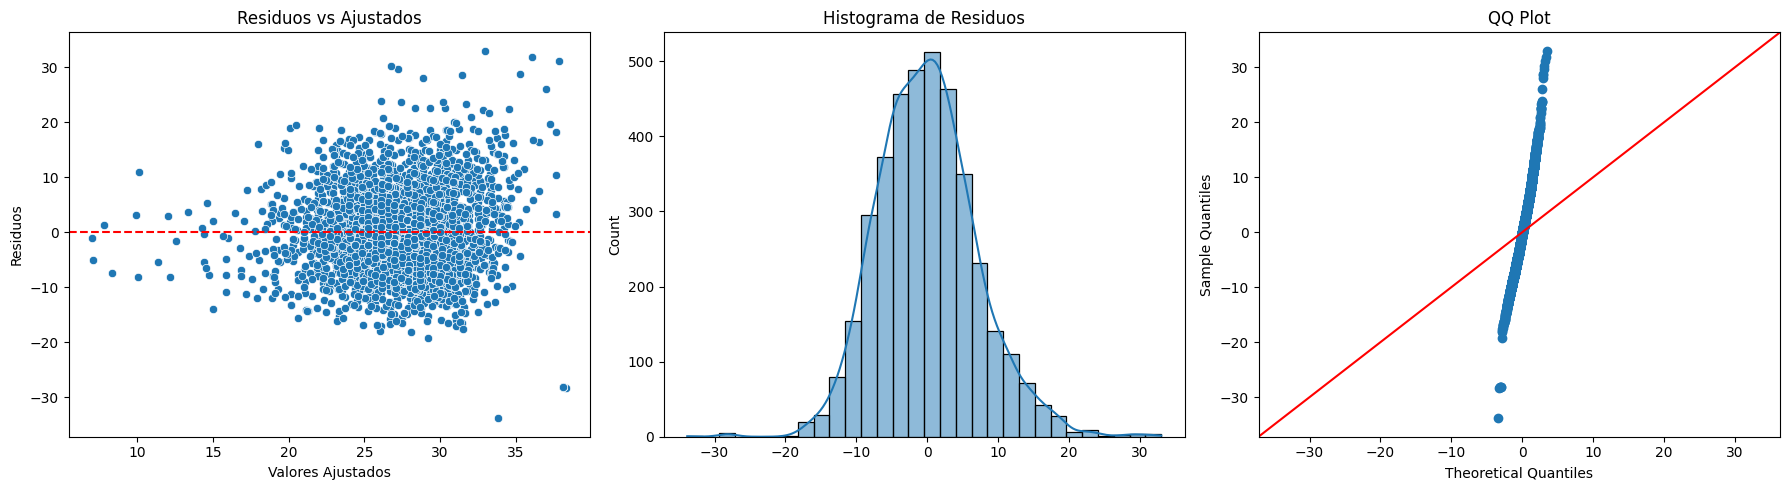


Interpretación:
- Normalidad: El QQ Plot muestra si los residuos siguen una distribución normal.
- Homocedasticidad: El gráfico de residuos vs ajustados debe mostrar dispersión aleatoria alrededor de cero.
- Histograma: Si es simétrico y con forma de campana, respalda la normalidad.



In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
file_path = ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")
df = pd.read_csv(file_path)

# Crear variable dependiente y predictoras
# Usamos ScoreA como dependiente y ScoreB + year como predictoras
X = df[["ScoreB", "year"]]
y = df["ScoreA"]

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo OLS
model = sm.OLS(y, X).fit()

# Obtener residuos y valores ajustados
residuals = model.resid
fitted = model.fittedvalues

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residuos vs Ajustados
sns.scatterplot(x=fitted, y=residuals, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuos vs Ajustados')
axes[0].set_xlabel('Valores Ajustados')
axes[0].set_ylabel('Residuos')

# 2. Histograma de residuos
sns.histplot(residuals, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histograma de Residuos')

# 3. QQ Plot
sm.qqplot(residuals, line='45', ax=axes[2])
axes[2].set_title('QQ Plot')

plt.tight_layout()
plt.show()

# Interpretación
print("""
Interpretación:
- Normalidad: El QQ Plot muestra si los residuos siguen una distribución normal.
- Homocedasticidad: El gráfico de residuos vs ajustados debe mostrar dispersión aleatoria alrededor de cero.
- Histograma: Si es simétrico y con forma de campana, respalda la normalidad.
""")

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# Cargar el dataset
file_path = ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")
df = pd.read_csv(file_path)

# Eliminar columnas irrelevantes y manejar valores nulos
df = df.drop(columns=['Date'])
df = df.dropna()

# Definir variable objetivo y predictoras
y = df['ScoreA']
X = df.drop(columns=['ScoreA'])

# Codificar variables categóricas
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Entrenar modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener importancia de variables
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar ranking
print("Ranking de importancia de variables (Random Forest):")
print(importance_df)

# Crear gráfico de barras
fig = px.bar(importance_df, x='Variable', y='Importancia',
             title='Importancia de Variables (Random Forest)', text='Importancia')
fig.show()

Ranking de importancia de variables (Random Forest):
         Variable  Importancia
2          ScoreB     0.319366
1           TeamB     0.163426
7     WinningTeam     0.156113
0           TeamA     0.129180
5            year     0.096319
6           Venue     0.080867
4  TournamentName     0.054730
3             Sex     0.000000


In [23]:
import pandas as pd
import plotly.express as px

# Cargar el dataset
file_path = ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")
df = pd.read_csv(file_path)

# Crear variable objetivo: 1 si TeamA gana, 0 si no
df['WinA'] = (df['ScoreA'] > df['ScoreB']).astype(int)

# Calcular tasa de victorias por país (TeamA)
victory_rate = df.groupby('TeamA')['WinA'].mean().sort_values(ascending=False)
victory_rate_df = victory_rate.reset_index()
victory_rate_df.columns = ['Pais', 'Tasa_Victoria']

# Mostrar top 10 países más determinantes
print("Top 10 países con mayor tasa de victoria:")
print(victory_rate_df.head(10))

# Crear gráfico de barras
fig = px.bar(victory_rate_df.head(10), x='Pais', y='Tasa_Victoria',
             title='Top 10 Países con Mayor Tasa de Victoria', text='Tasa_Victoria')
fig.show()

Top 10 países con mayor tasa de victoria:
                    Pais  Tasa_Victoria
0                  Gabon       1.000000
1  Serbia and Montenegro       1.000000
2            North Korea       0.900000
3                 Norway       0.828947
4                 Russia       0.793388
5                 Jordan       0.750000
6                 Brazil       0.741935
7                 Angola       0.718182
8                 France       0.711111
9            South Korea       0.710280


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el dataset
file_path = ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")
df = pd.read_csv(file_path)

# Crear variable objetivo: 1 si TeamA gana, 0 si no
df['WinA'] = (df['ScoreA'] > df['ScoreB']).astype(int)

# Eliminar columnas irrelevantes y manejar valores nulos
df = df.drop(columns=['Date'])
df = df.dropna()

# Definir X (predictoras) y y (objetivo)
X = df.drop(columns=['WinA'])
y = df['WinA']

# División en Train (70%), Validation (15%), Test (15%) con estratificación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Mostrar tamaños de cada conjunto
print("Tamaños de los conjuntos:")
print(f"Train: {X_train.shape[0]} filas")
print(f"Validation: {X_val.shape[0]} filas")
print(f"Test: {X_test.shape[0]} filas")

Tamaños de los conjuntos:
Train: 2712 filas
Validation: 581 filas
Test: 582 filas


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
# Cargar el dataset
file_path = ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")
df = pd.read_csv(file_path)

# Eliminar columnas irrelevantes y manejar valores nulos
df = df.drop(columns=['Date'])
df = df.dropna()

# Definir variable objetivo y predictoras
y = df['ScoreA']
X = df.drop(columns=['ScoreA'])

# Codificar variables categóricas
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# División en Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Entrenar modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones en Validation y Test
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calcular métricas R² y RMSE
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Mostrar resultados
print("Evaluación del modelo RandomForestRegressor:")
print(f"Validation -> R²: {r2_val:.4f}, RMSE: {rmse_val:.4f}")
print(f"Test -> R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}")

Evaluación del modelo RandomForestRegressor:
Validation -> R²: 0.5335, RMSE: 5.5131
Test -> R²: 0.4279, RMSE: 5.5502


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import plotly.express as px

# Cargar el dataset
file_path = ("https://raw.githubusercontent.com/ange86rosales-oss/Angelina_Rosales/refs/heads/Reentrega-proyecto-final/Entrega%20proyecto%20final/Handball_W_InternationalResults_with_Winner.csv")
df = pd.read_csv(file_path)

# Preprocesamiento: eliminar columnas irrelevantes y manejar valores nulos
df = df.drop(columns=['Date'])
df = df.dropna()

# Definir variable objetivo y predictoras
y = df['ScoreA']
X = df.drop(columns=['ScoreA'])

# Codificar variables categóricas
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# División en Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)